# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

**Business Use Case**
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

**Project Description**
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**About The Dataset**
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition\
•	ID: Unique client ID\
•	age: Age of the client\
•	job: Type of job\
•	marital: Marital status of the client\
•	education: Education level\
•	default: Credit in default.\
•	housing: Housing loan\
•	loan: Personal loan\
•	contact: Type of communication\
•	month: Contact month\
•	day_of_week: Day of week of contact\
•	duration: Contact duration\
•	campaign: number of contacts performed during this campaign to the client\
•	pdays: number of days that passed by after the client was last contacted\
•	previous: number of contacts performed before this campaign\
•	poutcome: outcome of the previous marketing campaign\

**Output variable (desired target):**

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


**1. Importing required libraries**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


**2. I have retrieved dataset from github link and saved it in csv foormat for further processing.**

In [2]:
df = pd.read_csv('bank.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


**3. EDA (Exploratory Data Analysis)**

In [3]:
df.shape

(31647, 18)

In [4]:
# Removing ID column
df.drop(['ID'], axis=1, inplace=True)

We will remove ID column as we don't require it.

We have 31647 rows and 18 columns in our datset

In [5]:
# First 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
# Last 5 rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
# Checking all columns information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


From above, we can see 10 catagorical variable and 7 numerical variable

In [9]:
# checking for null values

In [10]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values present in the dataset.

In [11]:
# check the missing values
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

no missing values in dataset

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From above, we can see pdays columns is having negative value, which indicates that some customers have not ben contacted since long time.

Also, in balance column, there is negative value present which confirms negative balance in the bank. Few customers might have debt or they may be having some financial difficulty.

There are outliers present in the dataset as we can see there is big gap between 75% and max data.

In [13]:
# checking output variable

In [14]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

From above, we can see there is high imbalance in the dataset.
Large number of customers have no subscribed for term deposit and very small numbers have subscribed it. 

Therefore, it suggest high imbalance and we will need to balance the dataset for our predictive model and accuracy. 

In [15]:
# checking negative balance and subscription

In [16]:
df[(df['balance']<=0)].value_counts().sum()

5135

In [17]:
df[(df['balance']<=0) & (df['subscribed']=='yes')].value_counts().sum()

341

So there are total 5135 customers who are having 0 balance out of which, 341 have subscribe for term deposit. It indicates that there may be error in the dataset or may be some customers are defaulters.

In [18]:
# Now we will check deposit subscription based on the education

In [19]:
df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [20]:
# primary education, balance 0, subscribed

In [21]:
df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='primary')].value_counts().sum()

41

In [22]:
# Secondary education, balance 0, subscribed

In [23]:
df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='secondary')].value_counts().sum()

179

In [24]:
# Tertiary education, balance 0, subscribed

In [25]:
df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='tertiary')].value_counts().sum()

115

We can see 179 secondary educated people with 0 balance have subscribed to term deposit out of 5135 low balance customer.

We can drop 341 rows who are subscribed to term deposit with 0 balance.

In [26]:
df = df.drop(df[(df['balance']<=0) & (df['subscribed']=='yes')].index)

In [27]:
df.shape

(31306, 17)

**4. Visualization**

In [28]:
# job category wise subscription

<Axes: xlabel='subscribed', ylabel='count'>

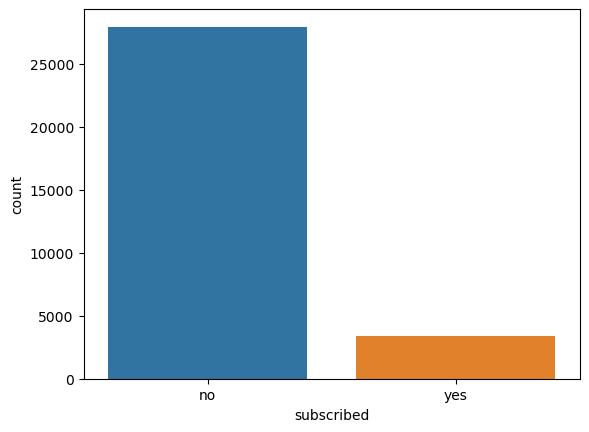

In [29]:
sns.countplot(data=df, x = 'subscribed')

In [30]:
#Categorical variables with respect to subscription

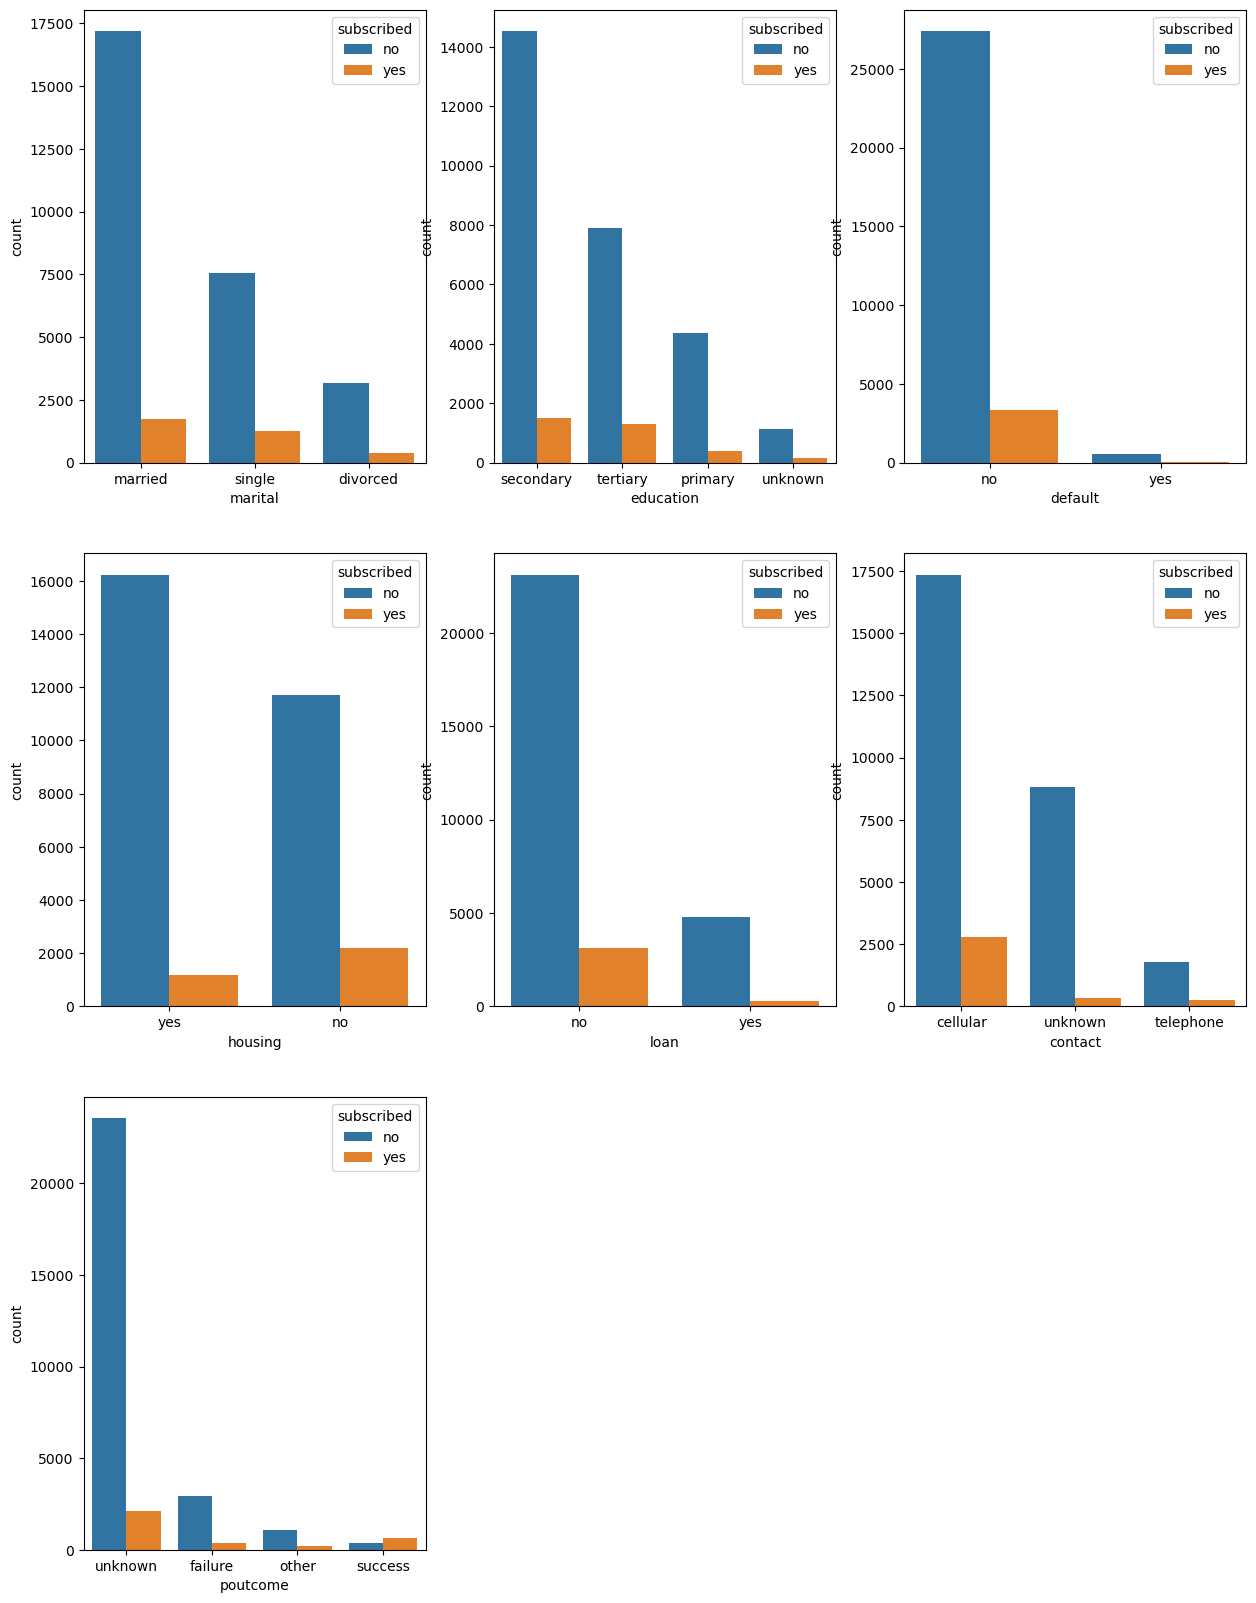

In [31]:
data = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(15,20))
n = 1
for column in data:
    ax = plt.subplot(3,3,n)
    sns.countplot(x = column, hue='subscribed', data=df, order=df[column].value_counts().index)
    plt.xlabel(column)
    n += 1
plt.show()  

From above, married and single have subscribed TD more than divorced. In education category, secondary and tertiary has higher rate of TD subscription.

Also with customer having no housing or any other loan have higher rate of TD subscription.

In poutcome column, customer has highe rate of subscription so it indicates high chance of success by targeting these customers.

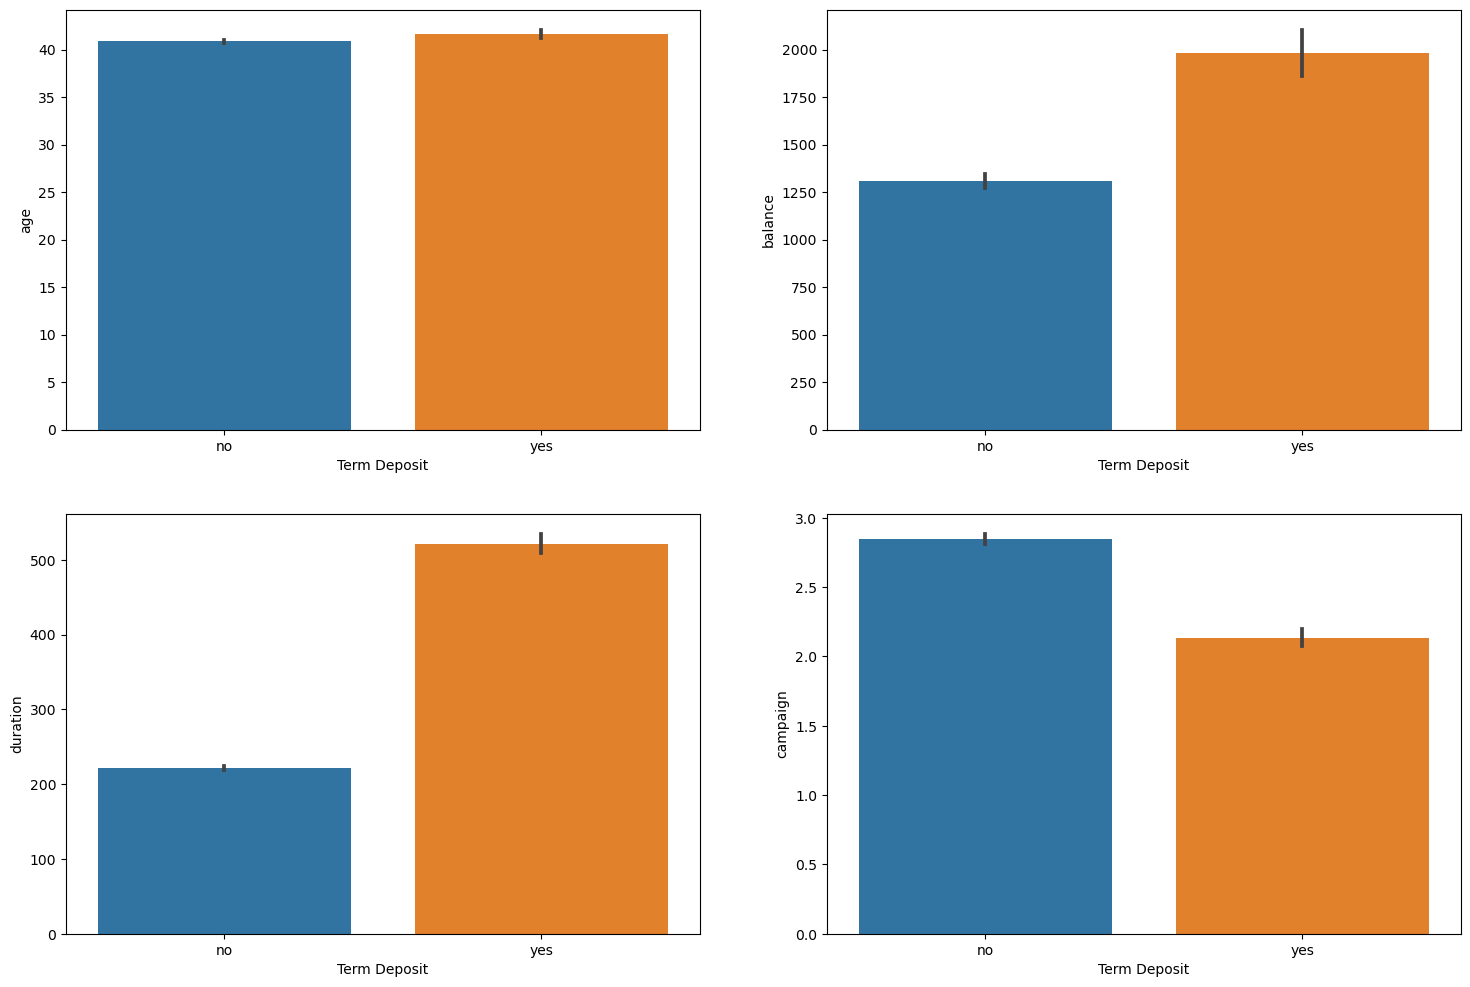

In [32]:

# Visualizing the distribution of customers subscribed or not term deposit using a violin plot with numerical columns

columns = ['age','balance','duration','campaign']

plt.figure(figsize=(18,12))
n=1
for col in columns:
    ax = plt.subplot(2,2,n)
    sns.barplot(x='subscribed', y=col ,data=df)
    plt.xlabel('Term Deposit')
    n += 1
plt.show()

<Axes: xlabel='balance', ylabel='duration'>

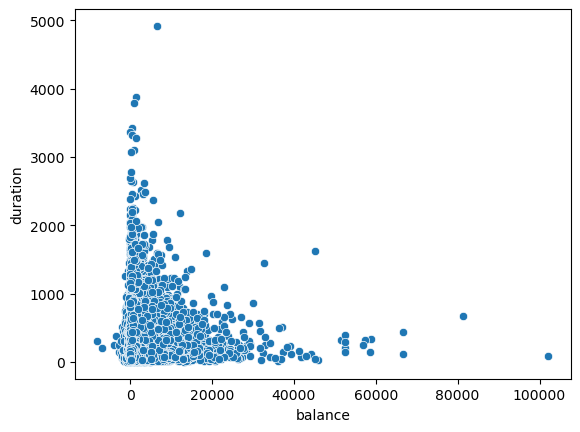

In [33]:
# checking the correlation between balance and duration column

sns.scatterplot(x='balance', y='duration', data=df)

From above we can see more no of customer were contacted with low or 0 balance.

In [34]:
# Checking outliers

age             Axes(0.125,0.77;0.227941x0.11)
balance      Axes(0.398529,0.77;0.227941x0.11)
day          Axes(0.672059,0.77;0.227941x0.11)
duration       Axes(0.125,0.638;0.227941x0.11)
campaign    Axes(0.398529,0.638;0.227941x0.11)
pdays       Axes(0.672059,0.638;0.227941x0.11)
previous       Axes(0.125,0.506;0.227941x0.11)
dtype: object

<Figure size 2300x1000 with 0 Axes>

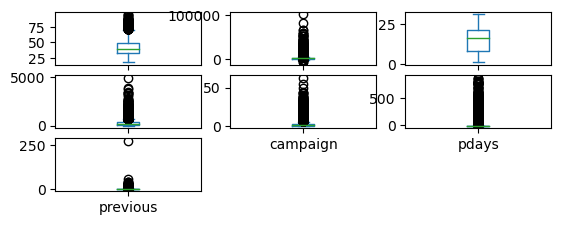

In [35]:
plt.figure(figsize = (23,10))
df.plot(kind='box',subplots=True, layout = (6,3))

we can see there are some outliers present in the dataset.

<Axes: >

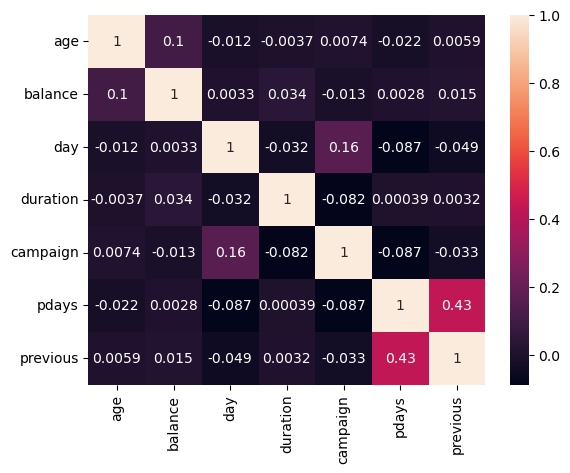

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
# converting categorical columns into binary class numeric columns
df["default"]=df["default"].apply(lambda x : 1 if x=='yes' else 0)
df["loan"]=df["loan"].apply(lambda x : 1 if x=='yes' else 0)
df["housing"]=df["housing"].apply(lambda x : 1 if x=='yes' else 0)
df["subscribed"]=df["subscribed"].apply(lambda x : 1 if x=='yes' else 0)

In [38]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,0,0,1,0,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,0,380,0,1,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,0,312,0,0,cellular,7,aug,37,3,-1,0,unknown,0
31645,57,technician,married,secondary,0,225,1,0,telephone,15,may,22,7,337,12,failure,0


In [39]:
# we will turn categorical variables into numerial using label encoder

In [40]:
col = df.select_dtypes("object").columns
col

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [41]:
le = LabelEncoder()

In [42]:
df[col] = df[col].apply(le.fit_transform)

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


<Axes: >

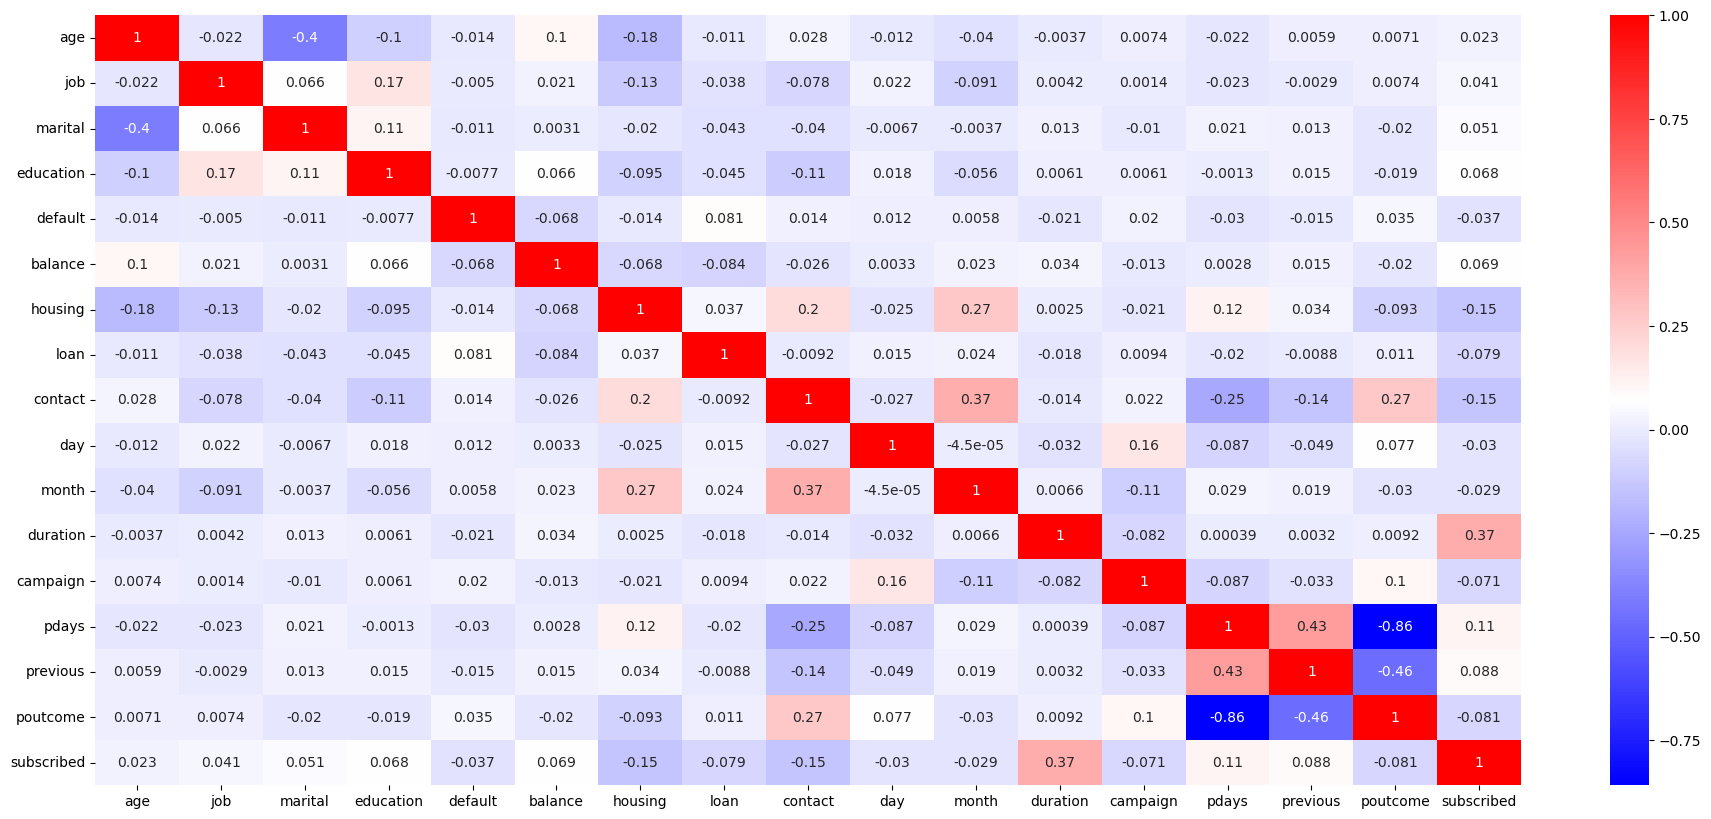

In [44]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(),annot=True, cmap='bwr')

We can see some positive correlaion between call duration, pdays, previous and subscription

**5. Machine Learning model selection**

In [45]:
# We will split data in input and output variable

In [46]:
x = df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0


In [47]:
y= df.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31306, dtype: int64

In [48]:
# we will remove outliers

In [49]:
z = np.abs(zscore(df))

In [50]:
threshold = 3
print(np.where(z>3))

(array([   20,    25,    35, ..., 31304, 31304, 31305], dtype=int64), array([12,  5, 13, ..., 13, 14, 11], dtype=int64))


In [51]:
dfn = df[(z<3).all(axis=1)]

In [52]:
df.shape

(31306, 17)

In [53]:
dfn.shape

(27302, 17)

Now we can see no of rows are reduced to 27584 after removing outlier.

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [55]:
x_train.shape

(21914, 16)

In [56]:
x_test.shape

(9392, 16)

In [57]:
y_train.shape

(21914,)

In [58]:
y_test.shape

(9392,)

In [59]:
y.value_counts()

0    27932
1     3374
Name: subscribed, dtype: int64

In [60]:
# We will scale our dataset using Standard Scaler

In [61]:
st = StandardScaler()
X = pd.DataFrame(st.fit_transform(x))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.419122,-1.324347,-0.276694,2.367414,-0.134467,0.181803,-1.118959,-0.439287,0.390918,0.379313,1.154387,-0.833070,-0.246429,-0.407488,-0.235356,0.440605
1,-0.937780,2.037787,-0.276694,-0.299670,-0.134467,-0.452965,-1.118959,-0.439287,-0.719414,0.499291,-0.177849,-0.646500,-0.246429,-0.407488,-0.235356,0.440605
2,-1.314884,0.815193,-0.276694,-0.299670,-0.134467,-0.160906,0.893688,-0.439287,-0.719414,0.259336,-0.177849,-0.055033,-0.566780,-0.407488,-0.235356,0.440605
3,1.513398,-0.101753,-1.926317,1.033872,-0.134467,0.627127,-1.118959,-0.439287,-0.719414,0.739246,0.155210,2.433889,-0.566780,0.450995,1.001934,-0.578500
4,-0.937780,1.426490,-0.276694,-0.299670,-0.134467,-0.414814,0.893688,-0.439287,-0.719414,-1.420350,-0.843967,0.500707,-0.566780,-0.407488,-0.235356,0.440605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31301,-1.126332,-0.101753,1.372930,1.033872,-0.134467,-0.453952,0.893688,-0.439287,-0.719414,-0.460530,0.821328,-0.547261,-0.246429,-0.407488,-0.235356,0.440605
31302,1.136294,-0.101753,-1.926317,1.033872,-0.134467,-0.328972,-1.118959,2.276416,-0.719414,-1.300372,0.155210,0.730942,-0.246429,-0.407488,-0.235356,0.440605
31303,-0.843504,-0.101753,1.372930,1.033872,-0.134467,-0.351337,-1.118959,-0.439287,-0.719414,-1.060417,-1.510085,-0.860857,0.073922,-0.407488,-0.235356,0.440605
31304,1.513398,1.426490,-0.276694,-0.299670,-0.134467,-0.379951,0.893688,-0.439287,0.390918,-0.100597,0.821328,-0.920401,1.355327,3.006245,4.713805,-2.616711


As we can see high imbalance in our independent (output) variable, we will need to balance it 

In [62]:
sm = SMOTE()

In [63]:
x_train,y_train = sm.fit_resample(x,y)

In [64]:
x_train.shape

(55864, 16)

In [65]:
y_train.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [66]:
lg = LogisticRegression()
gb = GaussianNB()
knb = KNeighborsClassifier()

In [67]:
model = [lg, gb, knb]

In [68]:
def bmodel():
    for m in model:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        print('Model Performance for:', m)
        print(accuracy_score(y_test, pred))
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        print('****************************************************************')

In [69]:
bmodel()

Model Performance for: LogisticRegression()
0.7934412265758092
[[6784 1653]
 [ 287  668]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      8437
           1       0.29      0.70      0.41       955

    accuracy                           0.79      9392
   macro avg       0.62      0.75      0.64      9392
weighted avg       0.89      0.79      0.83      9392

****************************************************************
Model Performance for: GaussianNB()
0.6270229982964225
[[5119 3318]
 [ 185  770]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75      8437
           1       0.19      0.81      0.31       955

    accuracy                           0.63      9392
   macro avg       0.58      0.71      0.53      9392
weighted avg       0.89      0.63      0.70      9392

****************************************************************
Model Performance for: KNeighborsClassifier(

In [70]:
dtc = DecisionTreeClassifier()
sv = SVC()
rfc = RandomForestClassifier()

In [71]:
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

1.0
[[8437    0]
 [   0  955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8437
           1       1.00      1.00      1.00       955

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



In [72]:
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7737436115843271
[[6592 1845]
 [ 280  675]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      8437
           1       0.27      0.71      0.39       955

    accuracy                           0.77      9392
   macro avg       0.61      0.74      0.62      9392
weighted avg       0.89      0.77      0.81      9392



In [73]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

1.0
[[8437    0]
 [   0  955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8437
           1       1.00      1.00      1.00       955

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



**6. Hyperparameter tunning**

In [74]:
# Applying Grid search cv to find best estimaters to improve model performance

param_grid = {'criterion' : ['gini', 'entropy'] }

In [77]:
gs = GridSearchCV(dtc, param_grid, cv=5, verbose=1)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=1)

In [81]:
gs.best_params_

{'criterion': 'entropy'}

In [82]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [83]:
cross_val_score(gs.best_estimator_, x_train, y_train, cv=5).mean() 

0.9045721250999282

In [85]:
data = DecisionTreeClassifier(criterion= 'entropy')
data.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
data.score(x_train,y_train)

1.0

Hence, DecisonTreeClassifier is our best model